In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_csv('loans_2007.csv')

In [3]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N


In [4]:
df.dtypes.value_counts()

float64    29
object     24
dtype: int64

In [5]:
df.select_dtypes('object').columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'hardship_flag',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')

In [6]:
df.isnull().sum().sort_values(ascending=False)

emp_title                     2629
pub_rec_bankruptcies          1368
emp_length                    1115
chargeoff_within_12_mths       148
collections_12_mths_ex_med     148
tax_liens                      108
revol_util                      93
last_pymnt_d                    86
delinq_2yrs                     32
delinq_amnt                     32
acc_now_delinq                  32
earliest_cr_line                32
inq_last_6mths                  32
open_acc                        32
pub_rec                         32
total_acc                       32
title                           16
annual_inc                       7
last_credit_pull_d               7
zip_code                         3
pymnt_plan                       3
purpose                          3
funded_amnt                      3
funded_amnt_inv                  3
term                             3
int_rate                         3
installment                      3
sub_grade                        3
grade               

# Data Cleaning

In [7]:
df.sample(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag
26758,4000.0,4000.0,4000.000000,60 months,15.95%,97.17,D,D4,Exempla Health Care,1 year,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
27885,16000.0,16000.0,15950.000000,36 months,16.32%,565.05,D,D5,"Osiris Group, Inc.",8 years,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
3343,24000.0,24000.0,23968.739086,36 months,8.90%,762.08,A,A5,Brett Sports,10+ years,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
13098,4000.0,4000.0,4000.000000,36 months,5.42%,120.64,A,A1,Chas .F. Williams,10+ years,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
6107,5700.0,5700.0,5700.000000,60 months,18.64%,146.74,E,E1,Jersey City BOE,10+ years,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N


In [8]:
df = df.drop(['emp_title', 'pub_rec_bankruptcies'],axis=1)

# leaking data
cols_drop_2 = ['total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
              'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
              'last_pymnt_d', 'last_pymnt_amnt']

df.drop(cols_drop_2, axis=1, inplace=True)

# this data is not useful for the model creating process
df= df.drop(['sub_grade','delinq_amnt', 'debt_settlement_flag', 'acc_now_delinq', 'funded_amnt', 'funded_amnt',
             'title', 'addr_state', 'zip_code','issue_d', 'tax_liens'],axis=1)

In [9]:
df['emp_length'] = df['emp_length'].replace({'< 1 year': '0'})
df['emp_length'] = pd.to_numeric(df['emp_length'].str.extract(r'(\d{1,2})')[0])

In [10]:
for i in df.columns:
    if len(df[i].value_counts())==1:
        df=df.drop(i,axis=1)

In [11]:
df['revol_util'] = pd.to_numeric(df['revol_util'].str.split('%').str[0])

In [12]:
df['term'] = pd.to_numeric(df['term'].str.strip().str.split(' ').str[0])

In [13]:
df['int_rate'] = pd.to_numeric(df['int_rate'].str.split('%').str[0])

In [14]:
df = df[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Charged Off')]
df['loan_status'] = df['loan_status'].replace({'Fully Paid':1, 'Charged Off':0})

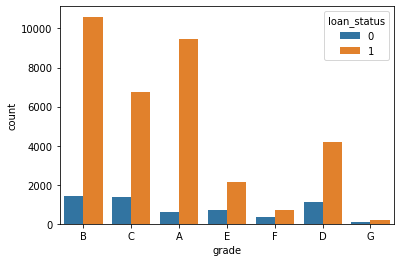

In [15]:
sns.countplot(df['grade'], hue=df['loan_status']);

In [16]:
df['grade'] = df['grade'].replace({'A':1, 'B':2, 'C':3, 'D':4, 'E':5,'F':6 ,'G':7})

In [17]:
df['last_credit_pull_d'] = pd.to_numeric(df['last_credit_pull_d'].str.split('-').str[1])
df['earliest_cr_line'] = pd.to_numeric(df['earliest_cr_line'].str.split('-').str[1])

In [18]:
df=df.dropna()

In [19]:
final_df = pd.DataFrame()
for i in df['purpose'].unique():
    purp_df = df[df['purpose'] == i]
      
    stats = purp_df.describe()['loan_amnt']
    meu = stats['mean']
    std_ = stats['std']

    a=meu+std_
    b=meu-std_
    
    final_df = final_df.append(purp_df[(purp_df['loan_amnt'] >= b) & (purp_df['loan_amnt'] <= a)])    
    
    

In [20]:
df = final_df

In [21]:
corr_cols = []
x=df.corr()['loan_status'].sort_values(ascending=False)
for i in x.index :
    if x[i] >= 0.1 or x[i] <= -0.1:
        corr_cols.append(i)
    
for i in df.select_dtypes('object').columns:
    corr_cols.append(i)

In [22]:
df = df[corr_cols]

# preparing for model

In [23]:
df1 = pd.get_dummies(df)

# train test split / Oversampling

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df1.drop('loan_status',axis=1)
y=df1['loan_status']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [27]:
smote = SMOTE()
X_train, y_train = smote.fit_sample(X_train, y_train)

In [28]:
X_train.shape, X_test.shape, y_train.shape

((36122, 27), (6953, 27), (36122,))

# MinMax scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

In [31]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
score= []
c_vals = []
penalty_ = []
for penalty in ['none', 'l2']:
    for c in [0.001,0.01,0.1,1,100,1000]:
        lr = LogisticRegression(C=c, penalty=penalty).fit(X_train_s, y_train)
        ypred = lr.predict(X_test_s)
        conf_matrix = confusion_matrix(y_test, ypred)
        recall = conf_matrix[0][0] / conf_matrix[0].sum() 
        penalty_.append(penalty)
        c_vals.append(c)
        score.append(recall)


pd.DataFrame([penalty_, c_vals, score])

# Recall for 0

,0,1,2,3,4,5,6,7,8,9,10,11
0,none,none,none,none,none,none,l2,l2,l2,l2,l2,l2
1,0.001,0.01,0.1,1,100,1000,0.001,0.01,0.1,1,100,1000
2,0.0877193,0.0877193,0.0877193,0.0877193,0.0877193,0.0877193,0.369518,0.202851,0.104167,0.0855263,0.0877193,0.0888158


In [33]:
lr = LogisticRegression(penalty='l2', C=.001).fit(X_train_s, y_train)
ypred = lr.predict(X_test_s)

confusion_matrix(y_test, ypred)
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.27      0.37      0.31       912
           1       0.90      0.85      0.87      6041

    accuracy                           0.79      6953
   macro avg       0.59      0.61      0.59      6953
weighted avg       0.82      0.79      0.80      6953



# Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

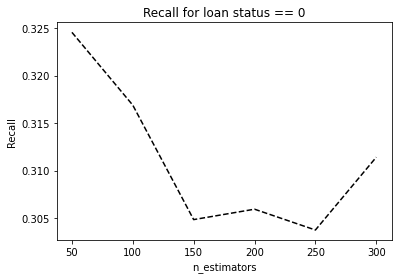

In [36]:
np.random.seed(101)
score = []
for i in range(50,350,50):
    rf = RandomForestClassifier(n_estimators=i).fit(X_train_s, y_train)
    ypred = rf.predict(X_test_s)
    conf_matrix = confusion_matrix(y_test, ypred)
    recall = conf_matrix[0][0] / conf_matrix[0].sum() 
    score.append(recall)
    

plt.plot(range(50,350,50), score, 'k--')
plt.title('Recall for loan status == 0')
plt.ylabel('Recall')
plt.xlabel('n_estimators');

In [37]:
np.random.seed(101)
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train_s, y_train)

RandomForestClassifier(n_estimators=50)

In [38]:
ypred = rf.predict(X_test_s)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
confusion_matrix(y_test, ypred)

array([[ 296,  616],
       [ 433, 5608]], dtype=int64)

In [41]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.41      0.32      0.36       912
           1       0.90      0.93      0.91      6041

    accuracy                           0.85      6953
   macro avg       0.65      0.63      0.64      6953
weighted avg       0.84      0.85      0.84      6953



# KNN neighbours

In [42]:
from sklearn.neighbors import KNeighborsClassifier

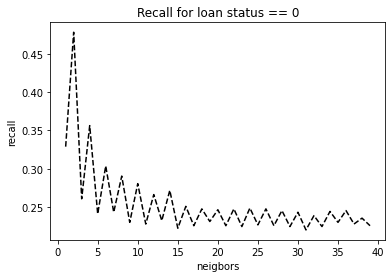

In [43]:
np.random.seed(101)
score = []
for i in range(1,40):
    knn =KNeighborsClassifier(n_neighbors=i).fit(X_train_s, y_train)
    ypred = knn.predict(X_test_s)
    conf_matrix = confusion_matrix(y_test, ypred)
    recall = conf_matrix[0][0] / conf_matrix[0].sum() 
    score.append(recall)
    
plt.plot(range(1,40), score, 'k--')
plt.title('Recall for loan status == 0')
plt.xlabel('neigbors')
plt.ylabel('recall');

In [44]:
np.random.seed(101)
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_s, y_train)

KNeighborsClassifier(n_neighbors=4)

In [45]:
ypred = knn.predict(X_test_s)

In [46]:
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))

[[ 325  587]
 [ 900 5141]]
              precision    recall  f1-score   support

           0       0.27      0.36      0.30       912
           1       0.90      0.85      0.87      6041

    accuracy                           0.79      6953
   macro avg       0.58      0.60      0.59      6953
weighted avg       0.81      0.79      0.80      6953



# Making a model using undersampling technique

# Preparing Data

In [47]:
df1.sample(5)

,loan_status,revol_util,term,last_credit_pull_d,grade,int_rate,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
17635,1,51.7,36.0,2018.0,3,13.06,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14517,1,7.0,36.0,2014.0,2,10.59,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22776,1,66.5,36.0,2013.0,1,6.17,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10625,1,36.5,36.0,2016.0,1,5.42,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13102,1,48.0,36.0,2016.0,4,15.99,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [48]:
rejected = df1[df1['loan_status']==0]
accepted = df1[df1['loan_status']==1]

In [49]:
rejected.shape, accepted.shape

((3708, 28), (24102, 28))

In [50]:
accepted=accepted.sample(frac=0.25)
df2 = pd.concat([accepted, rejected])
df2 = df2.sample(frac=1)
X = df2.drop('loan_status',axis=1)
y = df2['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [51]:
X_train.shape, X_test.shape, y_train.shape

((7300, 27), (2434, 27), (7300,))

In [52]:
scaler = MinMaxScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Random Forest

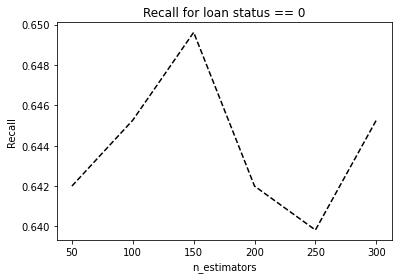

In [53]:
np.random.seed(101)
score = []
for i in range(50,350,50):
    rf = RandomForestClassifier(n_estimators=i).fit(X_train_s, y_train)
    ypred = rf.predict(X_test_s)
    conf_matrix = confusion_matrix(y_test, ypred)
    recall = conf_matrix[0][0] / conf_matrix[0].sum() 
    score.append(recall)
    

plt.plot(range(50,350,50), score, 'k--')
plt.title('Recall for loan status == 0')
plt.ylabel('Recall')
plt.xlabel('n_estimators');

In [54]:
np.random.seed(101)
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train_s, y_train)

ypred = rf.predict(X_test_s)

from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_test, ypred)

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.66      0.64      0.65       919
           1       0.79      0.80      0.79      1515

    accuracy                           0.74      2434
   macro avg       0.72      0.72      0.72      2434
weighted avg       0.74      0.74      0.74      2434



# KNN

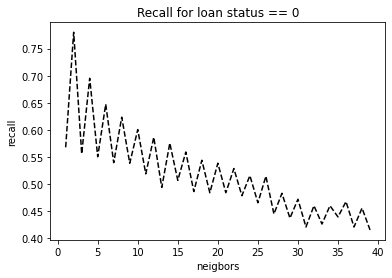

In [55]:
np.random.seed(101)
score = []
for i in range(1,40):
    knn =KNeighborsClassifier(n_neighbors=i).fit(X_train_s, y_train)
    ypred = knn.predict(X_test_s)
    conf_matrix = confusion_matrix(y_test, ypred)
    recall = conf_matrix[0][0] / conf_matrix[0].sum() 
    score.append(recall)
    
plt.plot(range(1,40), score, 'k--')
plt.title('Recall for loan status == 0')
plt.xlabel('neigbors')
plt.ylabel('recall');

In [56]:
np.random.seed(101)
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_s, y_train)

ypred = knn.predict(X_test_s)

print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))

[[639 280]
 [596 919]]
              precision    recall  f1-score   support

           0       0.52      0.70      0.59       919
           1       0.77      0.61      0.68      1515

    accuracy                           0.64      2434
   macro avg       0.64      0.65      0.64      2434
weighted avg       0.67      0.64      0.65      2434



# Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
score= []
c_vals = []
penalty_ = []
for penalty in ['l1', 'l2']:
    for c in [0.001,0.01,0.1,1,100,1000]:
        lr = LogisticRegression(C=c, penalty=penalty, solver='liblinear').fit(X_train_s, y_train)
        ypred = lr.predict(X_test_s)
        conf_matrix = confusion_matrix(y_test, ypred)
        recall = conf_matrix[0][0] / conf_matrix[0].sum() 
        penalty_.append(penalty)
        c_vals.append(c)
        score.append(recall)


In [59]:
pd.DataFrame([penalty_, c_vals, score])

,0,1,2,3,4,5,6,7,8,9,10,11
0,l1,l1,l1,l1,l1,l1,l2,l2,l2,l2,l2,l2
1,0.001,0.01,0.1,1,100,1000,0.001,0.01,0.1,1,100,1000
2,1,0.17519,0.385201,0.412405,0.416757,0.416757,0.0054407,0.286181,0.369967,0.405876,0.416757,0.416757


In [60]:
lr = LogisticRegression(solver='liblinear', penalty='l1', C=100).fit(X_train_s, y_train)
ypred = lr.predict(X_test_s)

confusion_matrix(y_test, ypred)
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.59      0.42      0.49       919
           1       0.70      0.82      0.76      1515

    accuracy                           0.67      2434
   macro avg       0.64      0.62      0.62      2434
weighted avg       0.66      0.67      0.65      2434

